# Breast Cancer Classification

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

**GOAL** - To classify tumors into `malignant (cancerous)` or `benign(non cancerous)`. 

Project Tasks:-
1.   Loading Python Libraries
2.   Loading Dataset
1.   Forming DataFrame
2.   Checking for missing data
1.   Correlation Matrix
2.   Visualize the relationship between  features
1.   Feature Scaling
2.   Model Training using KNN Algorithm
9.   Model Performance Evaluation


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# print features name
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

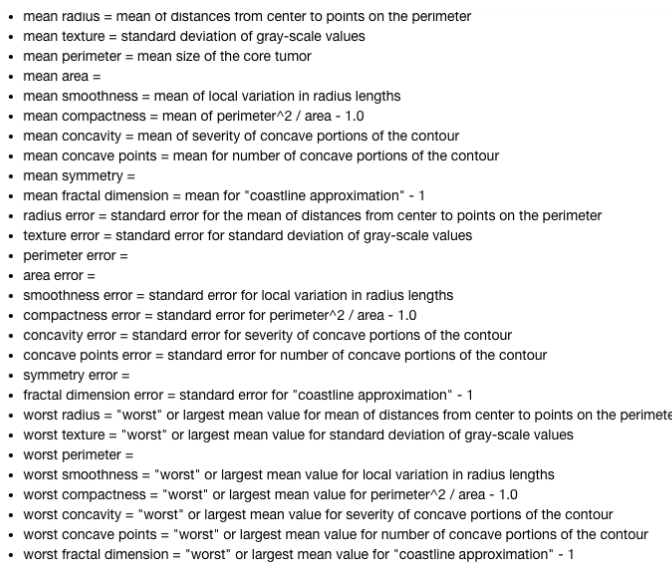

In [6]:
# Forming dataframe
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'],['target']))

In [7]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
df_cancer.shape

(569, 31)

**Observation-** 569 rows(data) and 31 columns(features)

In [9]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Observation-** No missing data

# Correlation Matrix

In [10]:
df_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


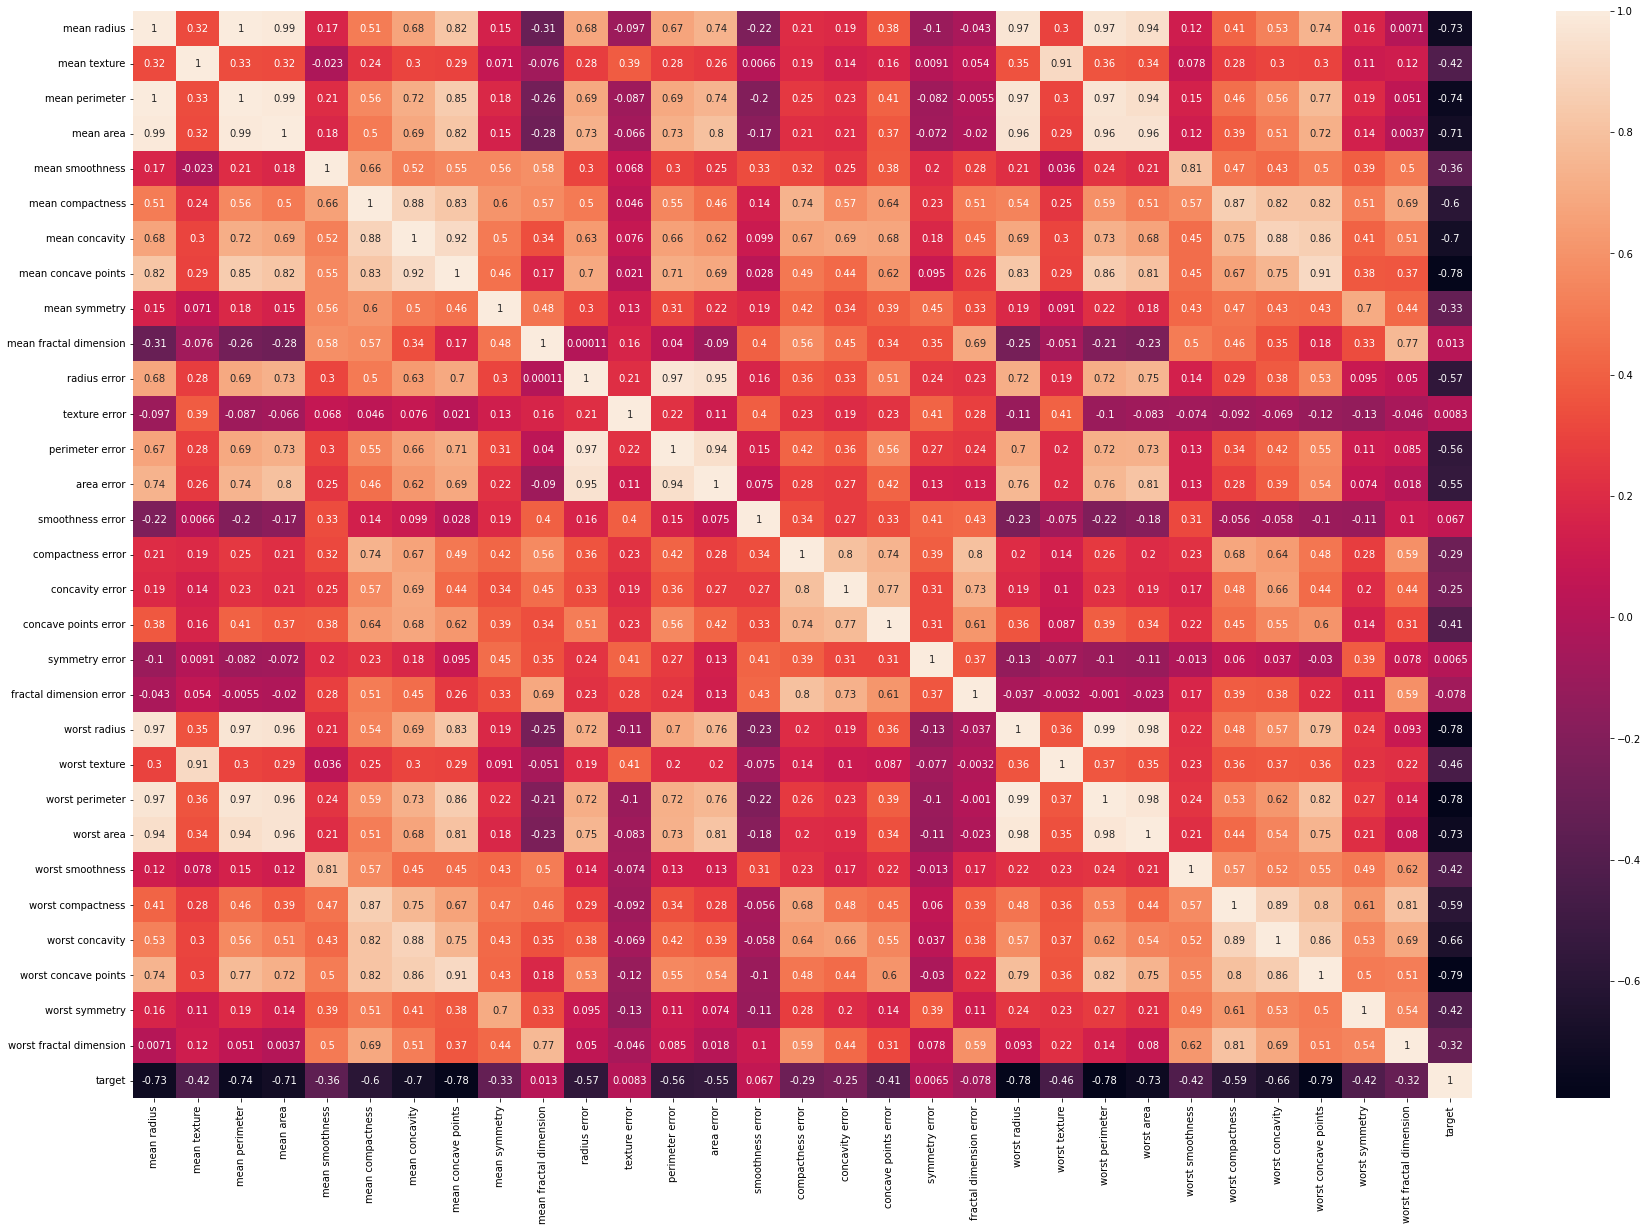

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df_cancer.corr(),annot=True)

## Plotting pairplot(Multivariate Analysis) 

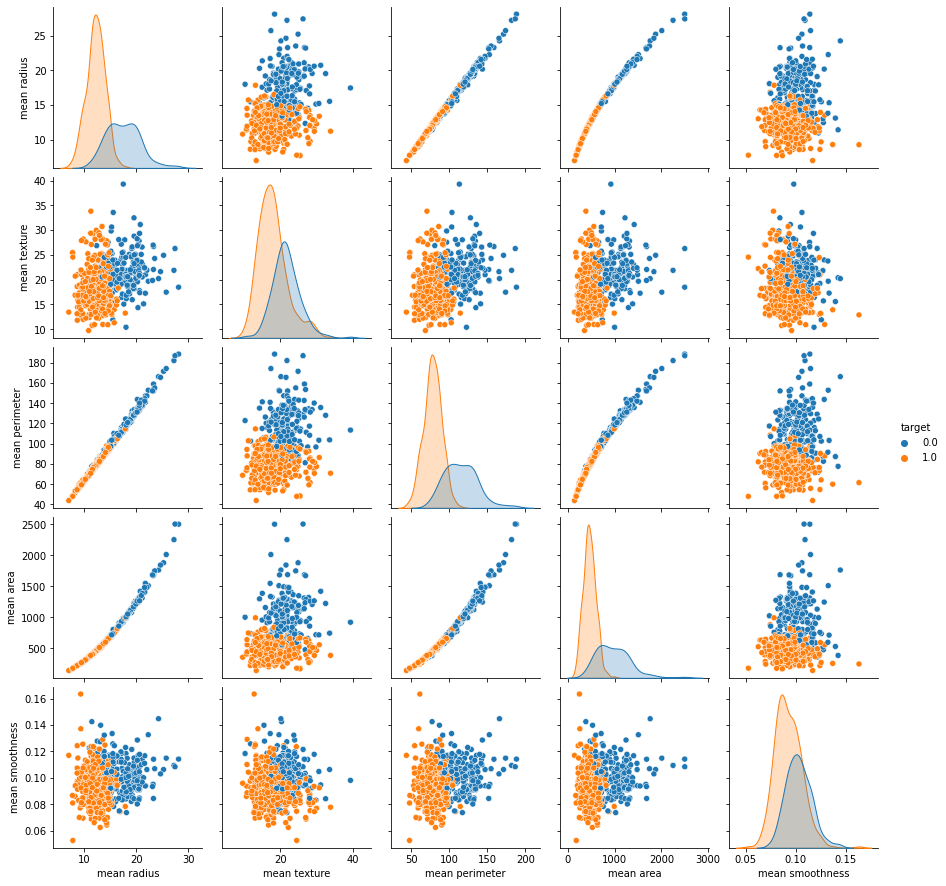

In [12]:
sns.pairplot(df_cancer, hue='target', vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

# Test Train Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_cancer.drop('target',axis=1), 
                                                    df_cancer['target'], test_size=0.25, 
                                                    random_state=94)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


**Observation-** 426 rows in training and 143 in testing

# Feature Scaling 

*   StandardScaler

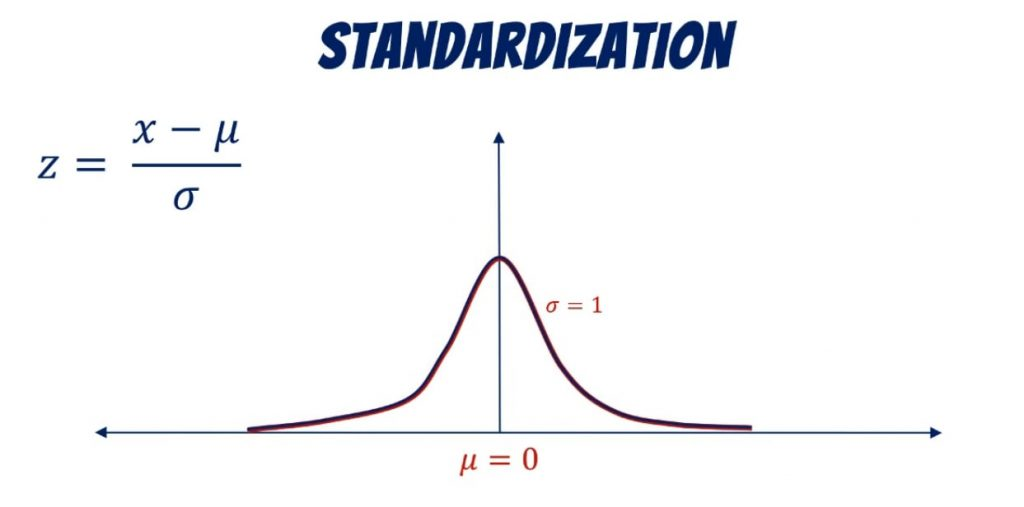

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  K-Nearest Neighbour (Model Training)

K-Nearest Neighbour is one of the simplest Machine Learning algorithms. KNN finds out the similarity between the new data & available data and put the new case into a category that is most similar to the available categories.

KNN is also called a lazy learner algorithm, as it does not learn from the training data immediately instead it stores the dataset and at the time of prediction, it performs an action on the dataset.

 - It is a Supervised Learning Algorithm which can be used for both classification and regression problems.
 - It can also handle non-linear data which was not possible in case of linear models
 
Advantages :
 - Easy to Implement
 - No Training Period : As the data itself is a model which will be later used as a reference for prediction.
 
Disadvantages :
 - Data needs to be scaled.
 - Sensitive to missing Data.
 - does not work well with Large Dataset.

In [16]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and Train  KNN Classifier
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)

# Model Performance Evaluation

## Confusion Matrix

 [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) : Compute confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix C is such that Cᵢ,ⱼ is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification, the count of true negatives is C₀,₀, false negatives is C₁,₀, true positives is C₁,₁ and false positives is C₀,₁.
   - TN / True Negative: Actual negative and predicted negative
   - TP / True Positive: Actual positive and predicted positive
   - FN / False Negative: Actual positive but predicted negative
   - FP / False Positive: Actual negative but predicted positive

Accuracy: Overall, how often is the classifier correct?

(TP+TN)/TN + TP + FN + FP



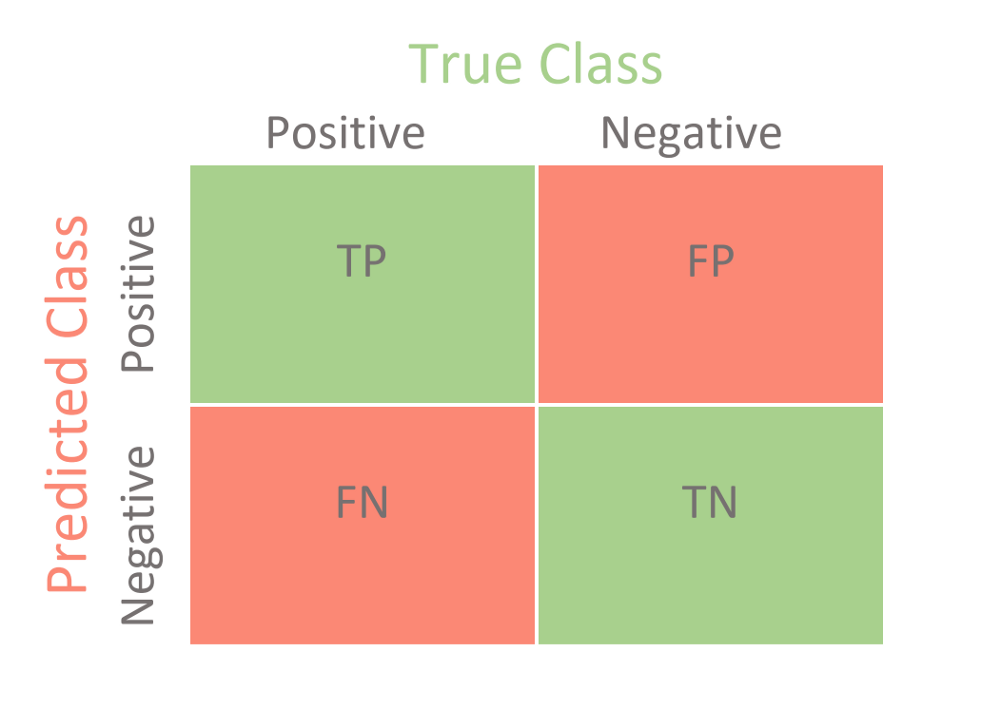



In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print('Confusion Matrix')
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

Confusion Matrix
[[52  1]
 [ 3 87]]
0.972027972027972


Observation:-

*   True Negative = 87
*   True Positive = 52
*   False Positive = 1
*  False Negative = 3






## Classification Report 

[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) : The classification report displays the accuracy, precision, recall, F1, and support scores for the model.

   - Accuracy - Total correct predictions divided by the total number of records in dataset.
   - Precision - What proportion of positive predictions were actually correct?
   - Recall - What percent of the positive cases did you catch?
   - F1 score - Harmonic mean of precision and recall. It is useful metric when you're trying to balance precision & recall
   - Support - The number of actual occurrences of the class in the dataset.

In [18]:
print('Classification Report')
print(classification_report(Y_test,pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        53
         1.0       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# Choosing the optimum K value
By deafult the value of nearest neighbours(k) is 5. We tune this value as different value K works best in different case.

In [19]:
# Here we will check Error for k value in range of 1 to 40
error_rate= []

for i in range(1,24):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error=np.mean(pred_i == Y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error_rate')

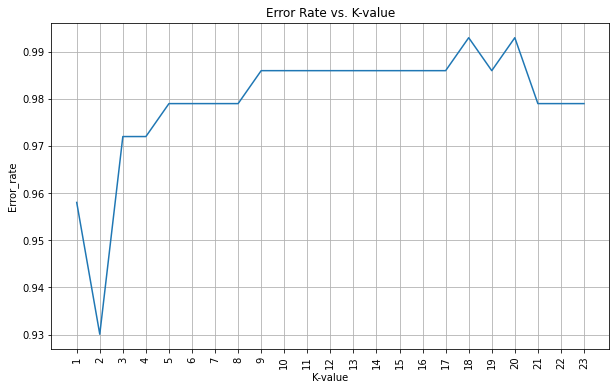

In [20]:
# Plot of Error vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,24), error_rate)
plt.title("Error Rate vs. K-value")
plt.xticks(list(range(1,24)),rotation=90)
plt.grid()

plt.xlabel('K-value')
plt.ylabel('Error_rate')

In [21]:
#WITH K=1(FOR COMPARISON)
knn = KNeighborsClassifier(n_neighbors= 18)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print()
print(confusion_matrix(Y_test,pred))
print()
print(classification_report(Y_test,pred))
print(f"Accuracy score is {(accuracy_score(Y_test,pred))*100} %")

WITH K=18

[[52  1]
 [ 0 90]]

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        53
         1.0       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy score is 99.3006993006993 %


In [22]:
#WITH K=1(FOR COMPARISON)
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print()
print(confusion_matrix(Y_test,pred))
print()
print(classification_report(Y_test,pred))
print(f"Accuracy score is {(accuracy_score(Y_test,pred))*100} %")

WITH K=20

[[52  1]
 [ 0 90]]

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        53
         1.0       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy score is 99.3006993006993 %
